## Customer Segmentation using K-Means Clustering

## Objective

To segment customers into different groups based on their purchasing behavior using the K-means clustering algorithm.


This can provide valuable insights for

- targeted marketing strategies
- recommendation systems
- personalized suggestion and search contents

## Dataset

We will use the popular `Mall Customer Segmentation` dataset which is open source and publicly available on Kaggle.

Source - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/

The dataset is mainly intended for educational purpose. However, I believe it is a good starting point and usable for our system.

## Preparing the dataset

I have downloaded the dataset in csv format to my google drive. We will load the csv file as a pandas dataframe.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/drive/MyDrive/datasets/mall_customers.csv")

## Basic Inspection

Based on our quick inspection, we can find followings

- dataset is relatively clean ( non-null values )
- `Gender` is a categorical feature
- `Age`, `Annual Income` & `Spending Score` are discrete values but they are on different scales. We need to normalize these data.

Total of 5 features with 200 samples.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Normalization

We will normalize three features.

- `Age`
- `Annual Income`
- `Spending Score`

In [6]:
scaler = StandardScaler()
target_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

df[target_features] = scaler.fit_transform(df[target_features])

print('Normalized dataset:')
df.head()

Normalized dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


In [7]:
# as we have normalized the features, let's rename some of those for clarity

df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


## Exploratory Data Analysis (EDA)

First, let's look at distribution of the three features which are discrete values.

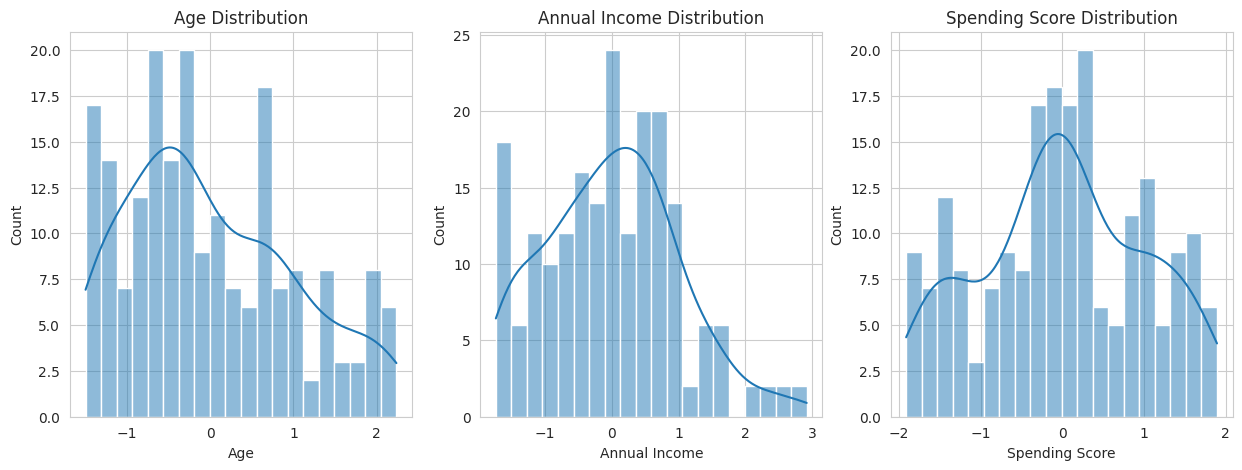

In [9]:
sns.set_style('whitegrid')

# we will utilize subplot feature and diplay three in side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.show()

Based on the KDE plots, we can see that all features are fairly distributed.

- The dataset contains the information of various ages.
- The distribution for Spending score is relatively even, indicating a variety of spending behaviors among the customers.

Next let's look at gender distribution of the customer base.

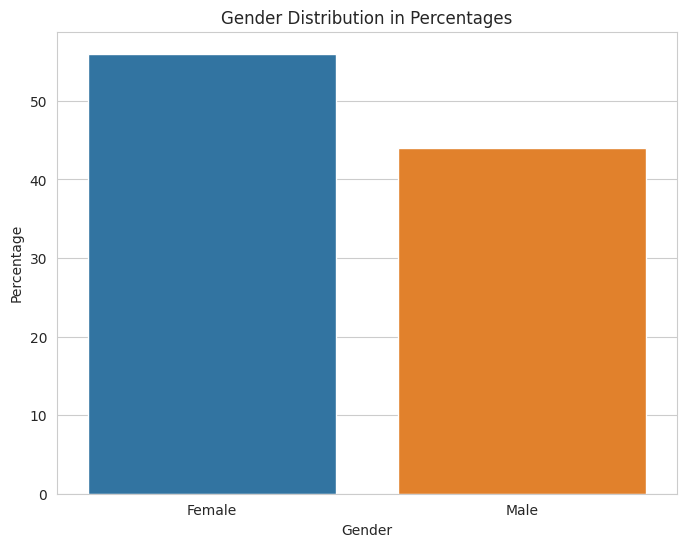

In [10]:
gender_counts = df['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution in Percentages')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()

It looks like Female customer base is more than male customer. I would say it is about 20% larger.

If the gap is so huge, we might need more intensive strategies to deal with each group. But for this dataset, it seems reasonable.

## Model Training (K-Means Clustering)

Now, we have a fair amount of insights for our data. It's a good time to train our model.

We will use unsupervised K-Means Clustering as we don't have the label in our dataset and we want to group the customers based on their bahaviour.

### Finding the Optimal number of Clusters

We need to find what's the optimal number of clusters for our customer segmentation system.

For this, we will apply elbow method on top of K-Means.
For simplicity, we will keep to these two features

- Annual Income
- Spending Score

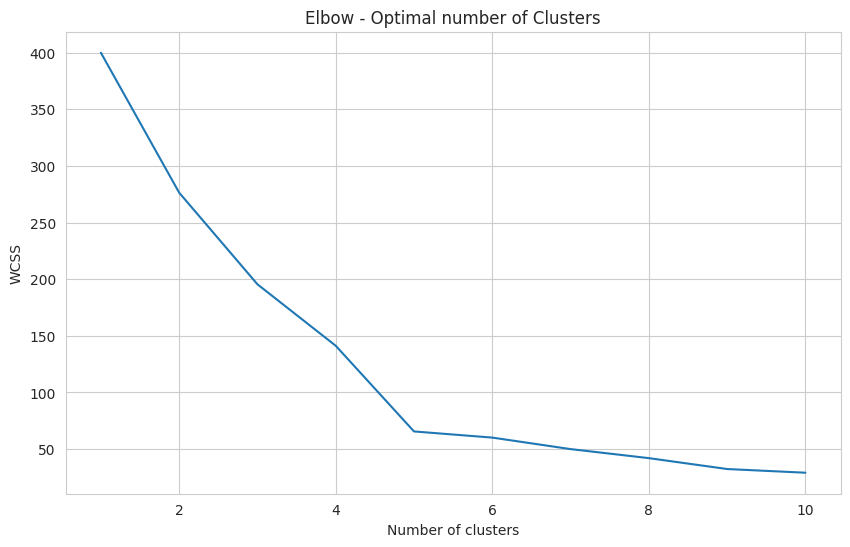

In [15]:
# within-cluster sum of square (WCSS) for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(df[['Annual Income', 'Spending Score']])
    wcss.append(kmeans.inertia_)

# plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow - Optimal number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on our experiment, the rate of decrease in `wcss` slows down after 5.

Therefore, we can treat this values as a optimal number of clusters for K-Means.

### Training

In [32]:
from sklearn.preprocessing import LabelEncoder

# encoding the 'Gender' column as it is categorical value
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

kmeans_all = KMeans(n_clusters=5, n_init='auto', init='k-means++', random_state=42)
cluster_labels = kmeans_all.fit_predict(df.drop(['CustomerID', 'Cluster'], axis=1))

# adding the new cluster labels to the dataset
df['Cluster'] = cluster_labels

df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,1,-1.424569,-1.738999,-0.434801,2
1,2,1,-1.281035,-1.738999,1.195704,2
2,3,0,-1.352802,-1.700830,-1.715913,3
3,4,0,-1.137502,-1.700830,1.040418,2
4,5,0,-0.563369,-1.662660,-0.395980,2


## Analysis & Visulization

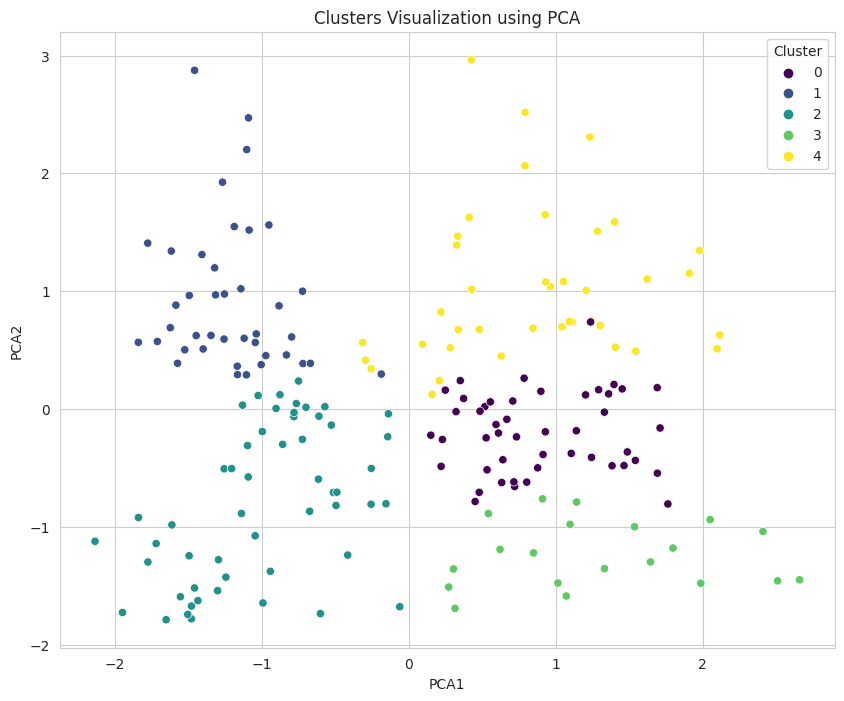

In [33]:
from sklearn.decomposition import PCA

cluster_characteristics = df.groupby('Cluster').mean()

# reducing the dimensions for visualization
pca = PCA(n_components=2)
clustered_data = pca.fit_transform(df.drop(['CustomerID', 'Cluster'], axis=1))

# creating a DataFrame for the clustered data
clustered_df = pd.DataFrame(clustered_data, columns=['PCA1', 'PCA2'])
clustered_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=clustered_df, palette='viridis')
plt.title('Clusters Visualization using PCA')
plt.show()

To visualize the clusters in a 2D plot,
we used Principal Component Analysis (PCA) to reduce the dimensionality of our dataset while retaining the essence of the data.

From the visualization, we can see

- how the clusters are formed
- where they are located and
- closed to each other

## Findings & Conclusion

The analysis shows the distinct customer segments, each with unique characteristics.

For example, some clusters represented customers with high income and high spending scores while others consisted of customers with lower income and spending levels.

The diversity in age and gender across clusters also provided valuable insights.

Our customer segmentation system provides a foundation for developing targeted marketing strategies.

By understanding the distinct needs and behaviors of each segment, businesses can adjust and remodify their approaches to maximize engagement and profitability.

## Future Works

- Deployment & Integration with real world application
- Develop a pipeline so that it is usable in real time
- Trained and further improve with more intensive data sources.